<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




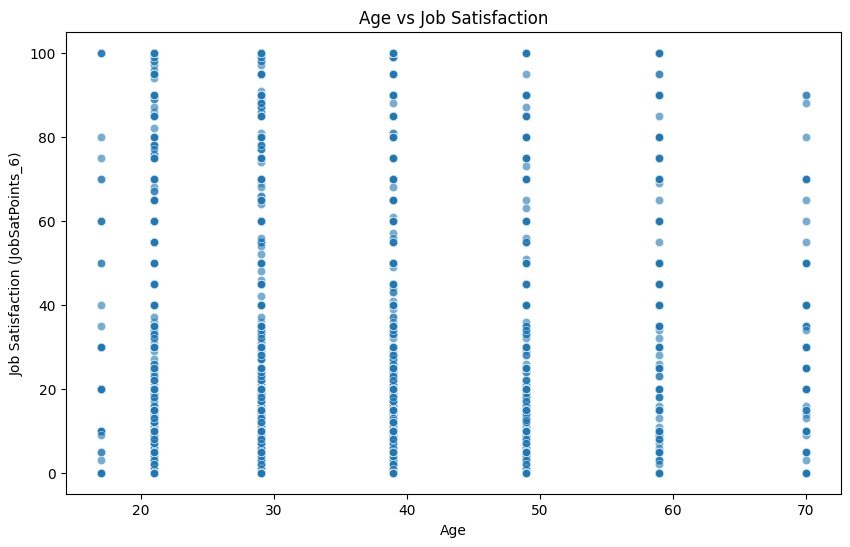

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Map Age Categories to Numeric Midpoints
# -----------------------------
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# Apply mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows where mapping didn't apply
df_clean = df.dropna(subset=['Age_numeric', 'JobSatPoints_6']).copy()

# Ensure JobSatPoints_6 is numeric
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
df_clean = df_clean.dropna(subset=['JobSatPoints_6'])

# -----------------------------
# Step 2: Scatter Plot
# -----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_numeric', y='JobSatPoints_6', data=df_clean, alpha=0.6)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.show()




#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


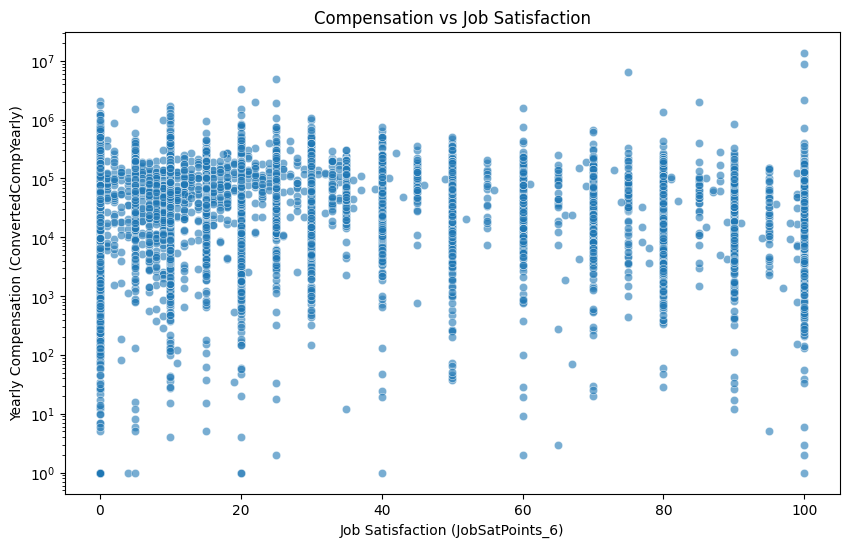

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Prepare Data
# -----------------------------
# Drop rows with missing values
df_comp = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6']).copy()

# Ensure numeric types
df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')
df_comp['JobSatPoints_6'] = pd.to_numeric(df_comp['JobSatPoints_6'], errors='coerce')

# Drop rows where conversion failed
df_comp = df_comp.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# -----------------------------
# Step 2: Scatter Plot
# -----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='JobSatPoints_6',
    y='ConvertedCompYearly',
    data=df_comp,
    alpha=0.6
)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.yscale('log')  # optional: handle extreme salary outliers
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


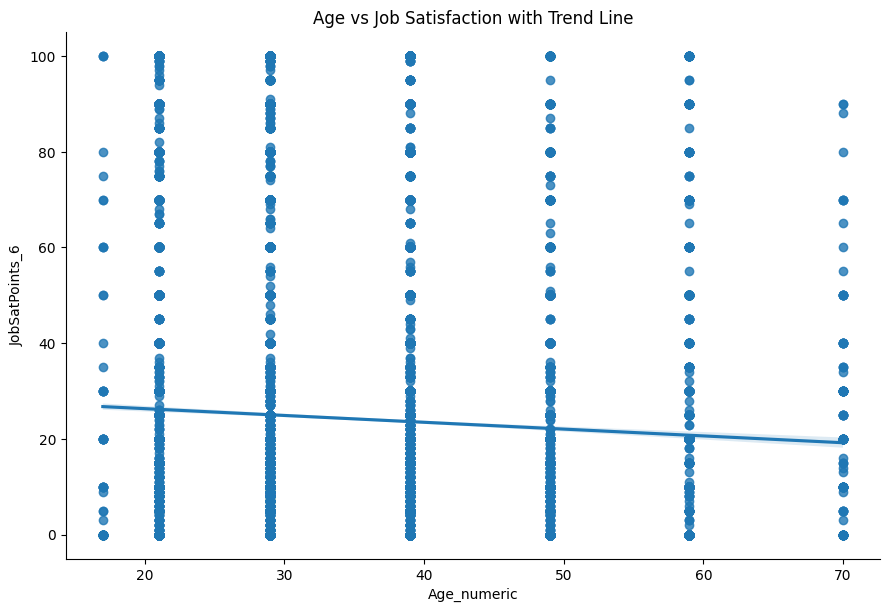

In [9]:
sns.lmplot(x='Age_numeric', y='JobSatPoints_6', data=df_clean, height=6, aspect=1.5)
plt.title('Age vs Job Satisfaction with Trend Line')
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


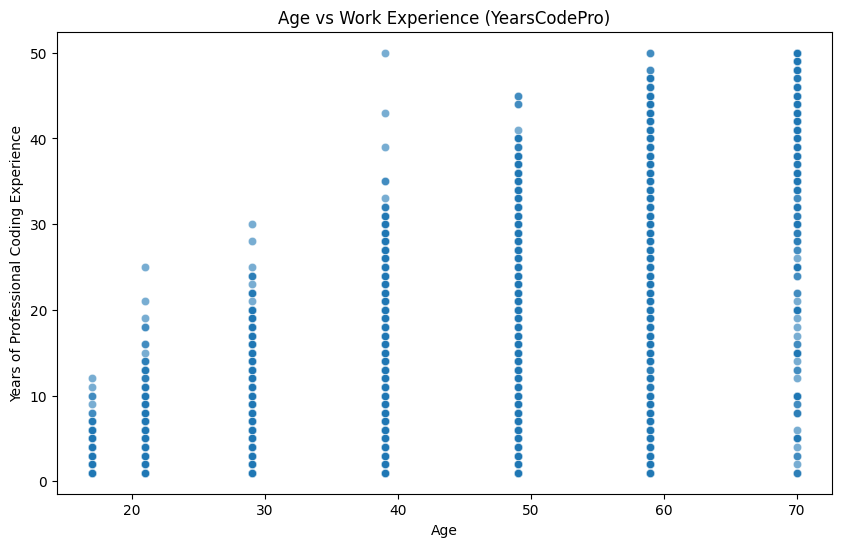

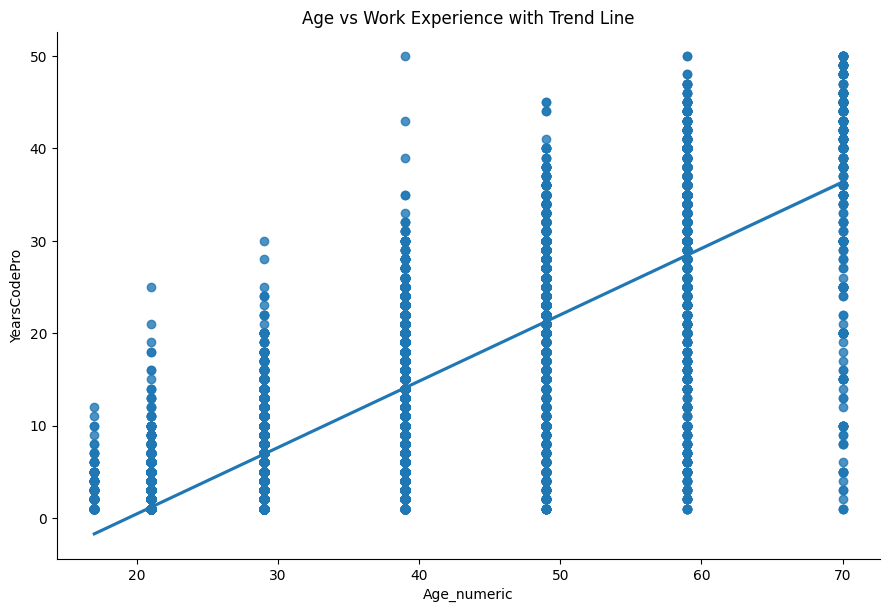

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Map Age Categories to Numeric
# -----------------------------
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# Apply mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows where mapping didn’t apply or YearsCodePro is missing
df_exp = df.dropna(subset=['Age_numeric', 'YearsCodePro']).copy()

# Ensure YearsCodePro is numeric
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')
df_exp = df_exp.dropna(subset=['YearsCodePro'])

# -----------------------------
# Step 2: Scatter Plot
# -----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_numeric', y='YearsCodePro', data=df_exp, alpha=0.6)
plt.title('Age vs Work Experience (YearsCodePro)')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.show()

# -----------------------------
# Step 3: Optional Trend Line
# -----------------------------
sns.lmplot(x='Age_numeric', y='YearsCodePro', data=df_exp, height=6, aspect=1.5)
plt.title('Age vs Work Experience with Trend Line')
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


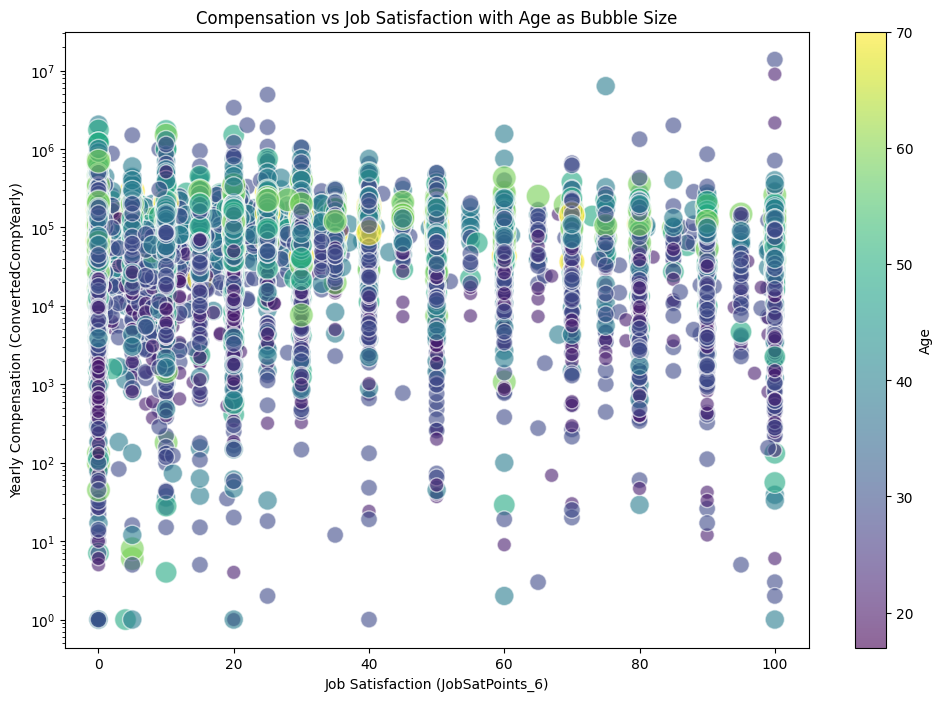

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Map Age Categories to Numeric
# -----------------------------
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping)

# -----------------------------
# Step 2: Prepare Data
# -----------------------------
# Drop rows with missing values
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']).copy()

# Ensure numeric types
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')
df_bubble['Age_numeric'] = pd.to_numeric(df_bubble['Age_numeric'], errors='coerce')

df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# -----------------------------
# Step 3: Create Bubble Plot
# -----------------------------
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df_bubble['JobSatPoints_6'],
    y=df_bubble['ConvertedCompYearly'],
    s=df_bubble['Age_numeric']*5,  # scale bubble size
    alpha=0.6,
    c=df_bubble['Age_numeric'],    # optional: color by age
    cmap='viridis',
    edgecolors='w'
)
plt.yscale('log')  # handle extreme compensation values
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.title('Compensation vs Job Satisfaction with Age as Bubble Size')
plt.colorbar(scatter, label='Age')
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


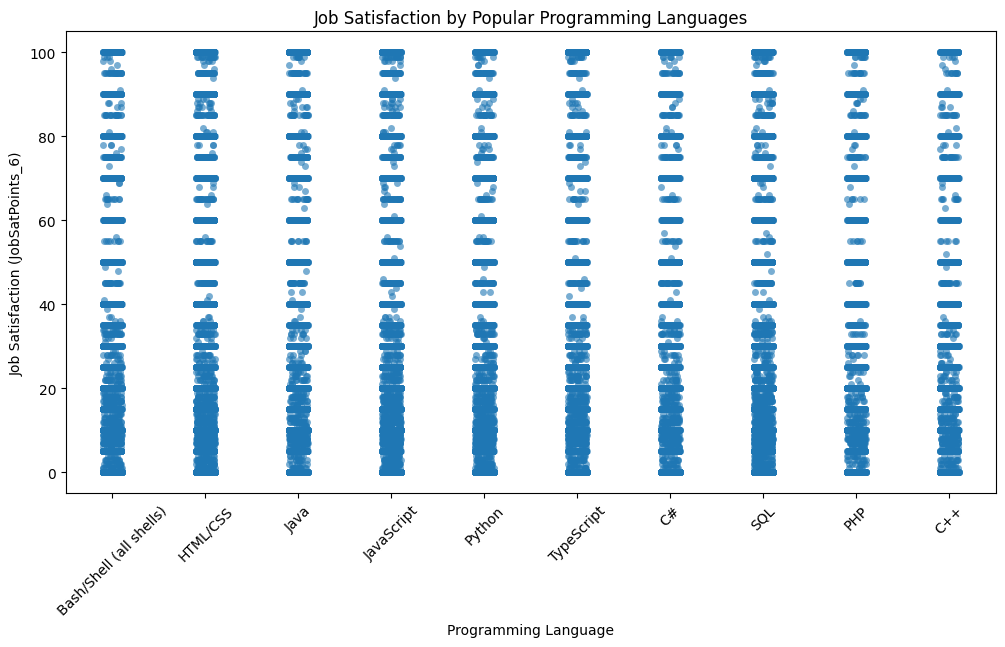

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Prepare Data
# -----------------------------
# Drop rows with missing values
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

# Ensure JobSatPoints_6 is numeric
df_lang['JobSatPoints_6'] = pd.to_numeric(df_lang['JobSatPoints_6'], errors='coerce')
df_lang = df_lang.dropna(subset=['JobSatPoints_6'])

# Split multiple languages into separate rows
df_lang_expanded = df_lang.assign(
    Language=df_lang['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Strip extra whitespace
df_lang_expanded['Language'] = df_lang_expanded['Language'].str.strip()

# -----------------------------
# Step 2: Filter Top Languages
# -----------------------------
top_languages = df_lang_expanded['Language'].value_counts().head(10).index
df_lang_top = df_lang_expanded[df_lang_expanded['Language'].isin(top_languages)]

# -----------------------------
# Step 3: Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 6))
sns.stripplot(
    x='Language',
    y='JobSatPoints_6',
    data=df_lang_top,
    jitter=True,  # horizontal jitter to separate overlapping points
    alpha=0.6
)
plt.title('Job Satisfaction by Popular Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.xticks(rotation=45)
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


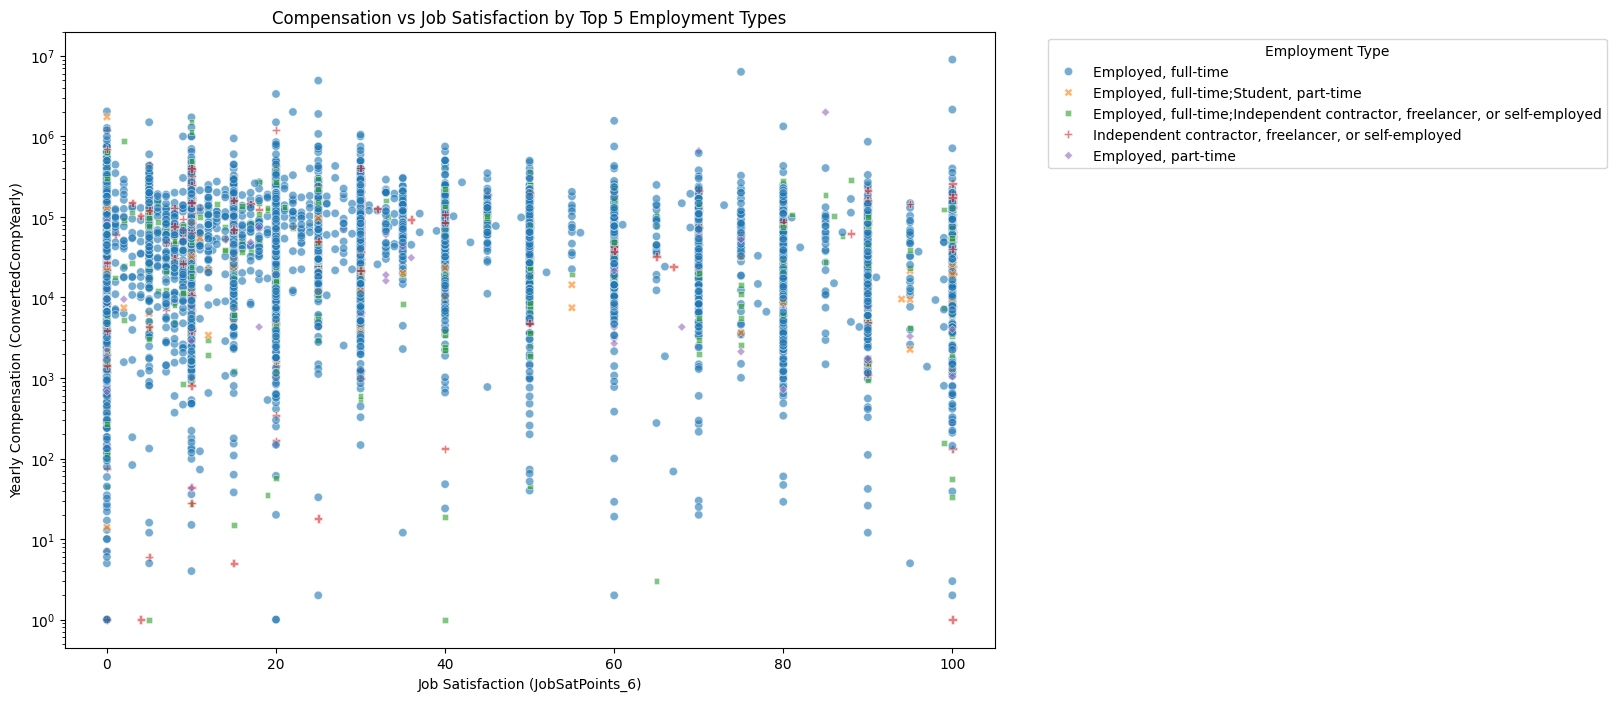

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Prepare Data
# -----------------------------
# Drop rows with missing values
df_emp = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()

# Ensure numeric types
df_emp['ConvertedCompYearly'] = pd.to_numeric(df_emp['ConvertedCompYearly'], errors='coerce')
df_emp['JobSatPoints_6'] = pd.to_numeric(df_emp['JobSatPoints_6'], errors='coerce')
df_emp = df_emp.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# -----------------------------
# Step 2: Filter Top 5 Employment Types
# -----------------------------
top5_employment = df_emp['Employment'].value_counts().head(5).index
df_emp_top5 = df_emp[df_emp['Employment'].isin(top5_employment)]

# -----------------------------
# Step 3: Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='JobSatPoints_6',
    y='ConvertedCompYearly',
    hue='Employment',           # color by employment type
    style='Employment',         # optional: different markers
    data=df_emp_top5,
    alpha=0.6
)
plt.yscale('log')  # optional: handle extreme compensation values
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.title('Compensation vs Job Satisfaction by Top 5 Employment Types')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Map Age Categories to Numeric
# -----------------------------
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping)

# -----------------------------
# Step 2: Prepare Data
# -----------------------------
# Drop rows with missing values
df_exp = df.dropna(subset=['YearsCodePro', 'Age', 'Country']).copy()

# Ensure YearsCodePro is numeric
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')
df_exp = df_exp.dropna(subset=['YearsCodePro'])

# Filter top 5 countries for readability
top_countries = df_exp['Country'].value_counts().head(5).index
df_exp_top = df_exp[df_exp['Country'].isin(top_countries)]

# -----------------------------
# Step 3: Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Age_numeric',
    y='YearsCodePro',
    hue='Country',         # color by country
    style='Age',           # marker by age group
    data=df_exp_top,
    alpha=0.6
)
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience (YearsCodePro)')
plt.title('Work Experience vs Age Group by Top 5 Countries')
plt.legend(title='Country / Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
